<a href="https://colab.research.google.com/github/PKjha720/CVIP-Data-Science/blob/main/speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=dd041d7dee03df0733ba065af686fc9d9facf5e0ed1e59a576d4e5e320a6efd7
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio
!pip install keras
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
!pip install keras.utils
from keras.utils import  to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
Ravdess="/content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition/Ravdess"
Crema="/content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition/Crema"
Savee="/content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition/Savee"
Tess="/content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition/Tess"

In [4]:
ravdess_directory_list=os.listdir(Ravdess)
print(ravdess_directory_list)

['audio_speech_actors_01-24']


In [5]:
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + '/'+dir)
file_emotion=[]
file_path=[]
for actor in os.listdir(Ravdess + '/'+dir):

  audio=os.listdir(Ravdess+'/'+dir+'/'+actor)

  for file in audio:
    part=file.split('.')[0]
    part=part.split('-')
    file_emotion.append(int(part[2]))
    file_path.append(Ravdess+'/'+dir+'/'+actor+'/'+file)
emotion_df=pd.DataFrame(file_emotion,columns=['Emotions'])
path_df=pd.DataFrame(file_path,columns=['Path'])
Ravdess_df=pd.concat([emotion_df,path_df],axis=1)
Ravdess_df.Emotions.replace({1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fear',7:'disgust',8:'surprise'},inplace=True)
Ravdess_df



Emotions                                               Path
0      neutral  /content/drive/MyDrive/Colab Notebooks/Speech ...
1      neutral  /content/drive/MyDrive/Colab Notebooks/Speech ...
2      neutral  /content/drive/MyDrive/Colab Notebooks/Speech ...
3      neutral  /content/drive/MyDrive/Colab Notebooks/Speech ...
4         calm  /content/drive/MyDrive/Colab Notebooks/Speech ...
...        ...                                                ...
1435       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
1436  surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
1437   disgust  /content/drive/MyDrive/Colab Notebooks/Speech ...
1438  surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
1439      fear  /content/drive/MyDrive/Colab Notebooks/Speech ...

[1440 rows x 2 columns]

In [6]:
crema_directory_list=os.listdir(Crema)
file_emotion=[]
file_path=[]
for file in crema_directory_list:

  file_path.append(Crema+'/'+file)
  part=file.split('.')[0]

  part=part.split('_')
  if part[2]=='SAD':
    file_emotion.append('sad')
  elif part[2]=='ANG':
    file_emotion.append('angry')
  elif part[2]=='DIS':
    file_emotion.append('disgust')
  elif part[2]=='FEA':
    file_emotion.append('fear')
  elif part[2]=='HAP':
    file_emotion.append('happy')
  elif part[2]=='NEU':
    file_emotion.append('neutral')
  else:
    file_emotion.append('Unknown')
emotion_df=pd.DataFrame(file_emotion,columns=['Emotions'])
path_df=pd.DataFrame(file_path,columns=['Path'])
Crema_df=pd.concat([emotion_df,path_df],axis=1)
Crema_df


Emotions                                               Path
0         sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
1         sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
2     disgust  /content/drive/MyDrive/Colab Notebooks/Speech ...
3         sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
4       angry  /content/drive/MyDrive/Colab Notebooks/Speech ...
...       ...                                                ...
7447  disgust  /content/drive/MyDrive/Colab Notebooks/Speech ...
7448  disgust  /content/drive/MyDrive/Colab Notebooks/Speech ...
7449     fear  /content/drive/MyDrive/Colab Notebooks/Speech ...
7450      sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
7451     fear  /content/drive/MyDrive/Colab Notebooks/Speech ...

[7452 rows x 2 columns]

In [7]:
tess_directory_list=os.listdir(Tess)
print(tess_directory_list)
file_emotion=[]
file_path=[]
for dir in tess_directory_list:
  directories=os.listdir(Tess+'/'+dir)
  for file in directories:

    part=file.split('.')[0]

    part=part.split('_')[2]

    if part=='ps':
      file_emotion.append('surprise')
    else:
      file_emotion.append(part)
    file_path.append(Tess+'/'+dir+'/'+file)
emotion_df=pd.DataFrame(file_emotion,columns=['Emotions'])
path_df=pd.DataFrame(file_path,columns=['Path'])
Tess_df=pd.concat([emotion_df,path_df],axis=1)
Tess_df

['YAF_pleasant_surprised', 'YAF_sad', 'YAF_neutral', 'YAF_happy', 'YAF_fear', 'YAF_disgust', 'YAF_angry', 'OAF_angry', 'OAF_Pleasant_surprise', 'OAF_neutral', 'OAF_Fear', 'OAF_happy', 'OAF_disgust', 'OAF_Sad']


Emotions                                               Path
0     surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
1     surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
2     surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
3     surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
4     surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
...        ...                                                ...
2795       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
2796       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
2797       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
2798       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
2799       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...

[2800 rows x 2 columns]

In [8]:
savee_directory_list=os.listdir(Savee)
file_emotion=[]
file_path=[]
for file in savee_directory_list:
  part=file.split('.')[0]
  part=part.split('_')[1]
  ele=part[:-2]
  if ele == 'a':
    file_emotion.append('angry')
  elif ele=='d':
    file_emotion.append('disgust')
  elif ele=='f':
    file_emotion.append('fear')
  elif ele=='h':
    file_emotion.append('happy')
  elif ele=='n':
    file_emotion.append('neutral')
  elif ele=='sa':
    file_emotion.append('sad')
  else:
    file_emotion.append('surprise')

  file_path.append(Savee+'/'+file)
emotion_df=pd.DataFrame(file_emotion,columns=['Emotions'])
path_df=pd.DataFrame(file_path,columns=['Path'])
Savee_df=pd.concat([emotion_df,path_df],axis=1)
Savee_df.head()


Emotions                                               Path
0    angry  /content/drive/MyDrive/Colab Notebooks/Speech ...
1    angry  /content/drive/MyDrive/Colab Notebooks/Speech ...
2    angry  /content/drive/MyDrive/Colab Notebooks/Speech ...
3    angry  /content/drive/MyDrive/Colab Notebooks/Speech ...
4    angry  /content/drive/MyDrive/Colab Notebooks/Speech ...

In [9]:
data_path=pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

data_path.to_csv('/content/drive/MyDrive/Colab Notebooks/Speech Emotion Recognition/'+'data_csv',index=False)
data_path

Emotions                                               Path
0     neutral  /content/drive/MyDrive/Colab Notebooks/Speech ...
1     neutral  /content/drive/MyDrive/Colab Notebooks/Speech ...
2     neutral  /content/drive/MyDrive/Colab Notebooks/Speech ...
3     neutral  /content/drive/MyDrive/Colab Notebooks/Speech ...
4        calm  /content/drive/MyDrive/Colab Notebooks/Speech ...
..        ...                                                ...
475       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
476  surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
477       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...
478  surprise  /content/drive/MyDrive/Colab Notebooks/Speech ...
479       sad  /content/drive/MyDrive/Colab Notebooks/Speech ...

[12172 rows x 2 columns]

In [10]:
print(data_path['Emotions'].dtype)

object


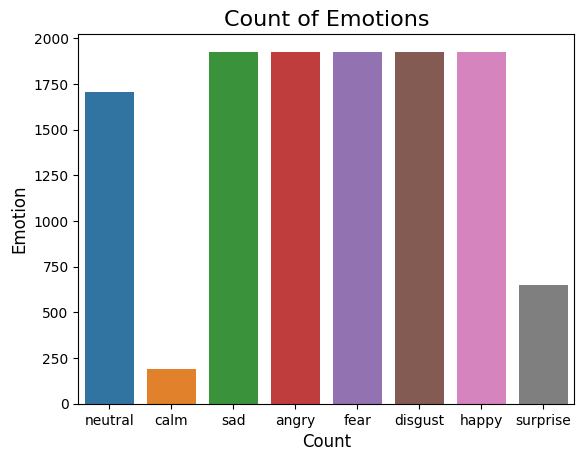

In [11]:
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=data_path)

plt.xlabel('Count', size=12)
plt.ylabel('Emotion', size=12)
plt.show()

In [12]:
def create_wave_plot(data,sr,e):
  plt.figure(figsize=(10,3))
  plt.title('Waveplot with audio with {} emotion'.format(e),size=15)
  plt.plot(data)
  plt.show()
def create_spectogram(data,sr,e):
  X=librosa.stft(data)
  Xdb=librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(12,3))
  plt.title('Spectogram for audio with {} emotion'.format(e), size=15)
  librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()

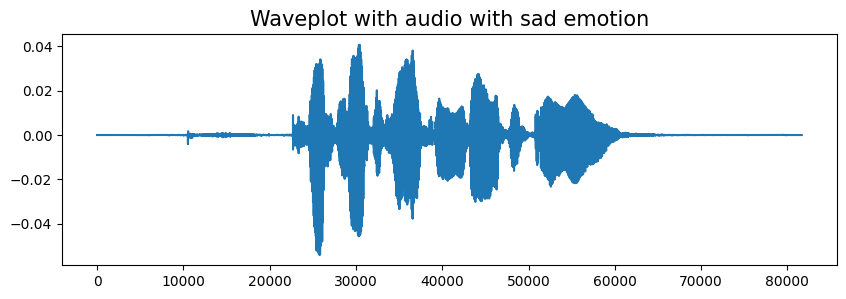

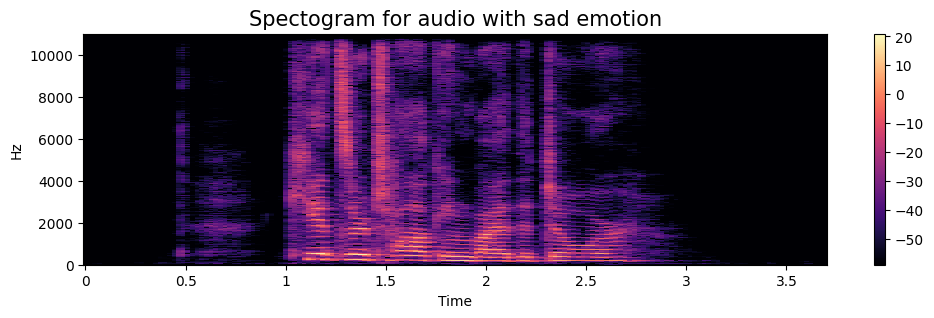

In [13]:
emotion='sad'
path=np.array(data_path.Path[data_path.Emotions==emotion])[1]
data,sampling_rate=librosa.load(path)
create_wave_plot(data,sampling_rate,emotion)
create_spectogram(data,sampling_rate,emotion)
Audio(path)

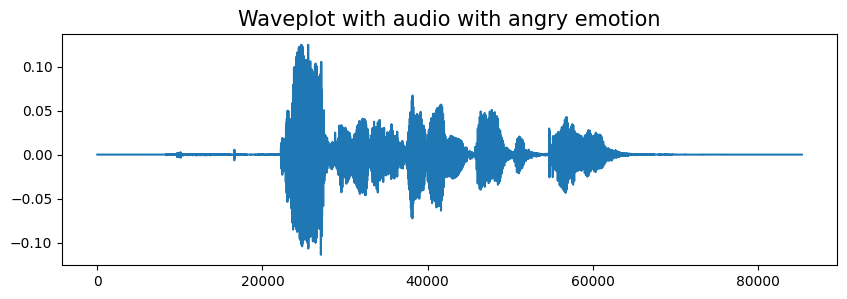

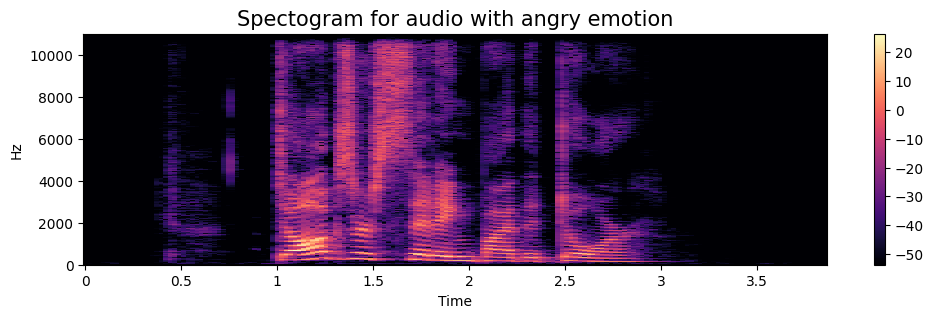

In [14]:
emotion='angry'
path=np.array(data_path.Path[data_path.Emotions==emotion])[1]
data,sampling_rate=librosa.load(path)
create_wave_plot(data,sampling_rate,emotion)
create_spectogram(data,sampling_rate,emotion)
Audio(path)

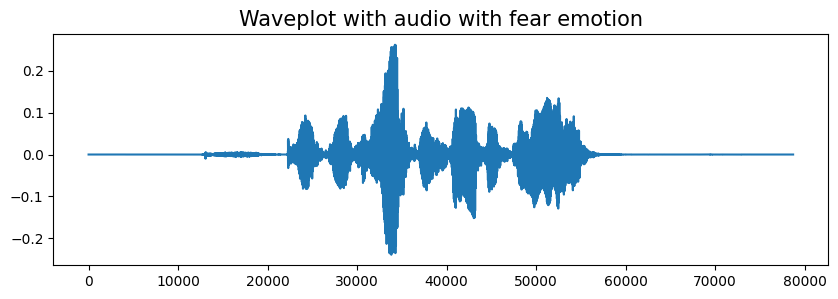

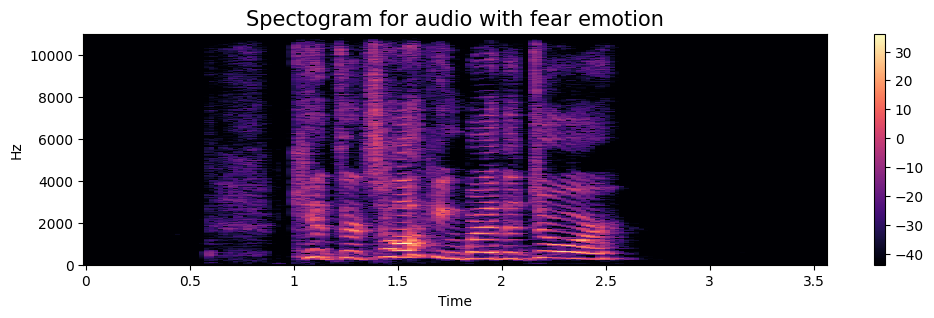

In [15]:
emotion='fear'
path=np.array(data_path.Path[data_path.Emotions==emotion])[1]
data,sampling_rate=librosa.load(path)

create_wave_plot(data,sampling_rate,emotion)
create_spectogram(data,sampling_rate,emotion)
Audio(path)

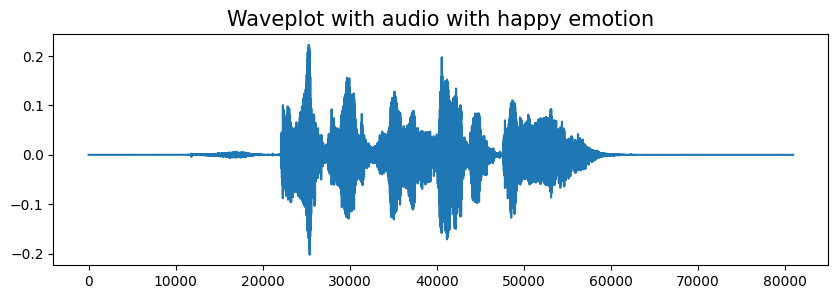

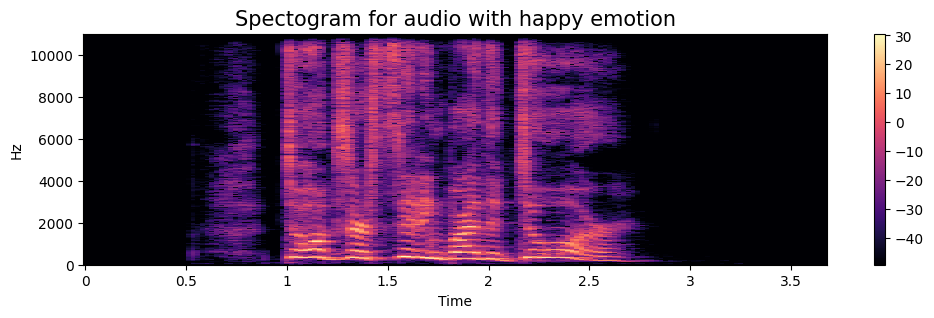

In [16]:
emotion='happy'
path=np.array(data_path.Path[data_path.Emotions==emotion])[1]
data,sampling_rate=librosa.load(path)
create_wave_plot(data,sampling_rate,emotion)
create_spectogram(data,sampling_rate,emotion)
Audio(path)

In [17]:
!pip install --upgrade librosa


In [18]:
!pip install pydub


In [19]:
def noise(data):
  noise_amp=0.035*np.random.uniform()*np.amax(data)
  data=data+noise_amp*np.random.normal(size=data.shape[0])
  return data

from pydub import AudioSegment

def stretch(data, rate=0.8):
    audio_segment = AudioSegment(data.tobytes(), frame_rate=sample_rate, sample_width=data.dtype.itemsize, channels=1)
    stretched_audio = audio_segment.speedup(playback_speed=1 / rate)
    return np.array(stretched_audio.get_array_of_samples(), dtype=np.float32)

def shift(data):
  shift_range=int(np.random.uniform(low=-5,high=5)*1000)
  return np.roll(data, shift_range)

import librosa

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

path=np.array(data_path.Path)[1]
data,sample_rate=librosa.load(path)

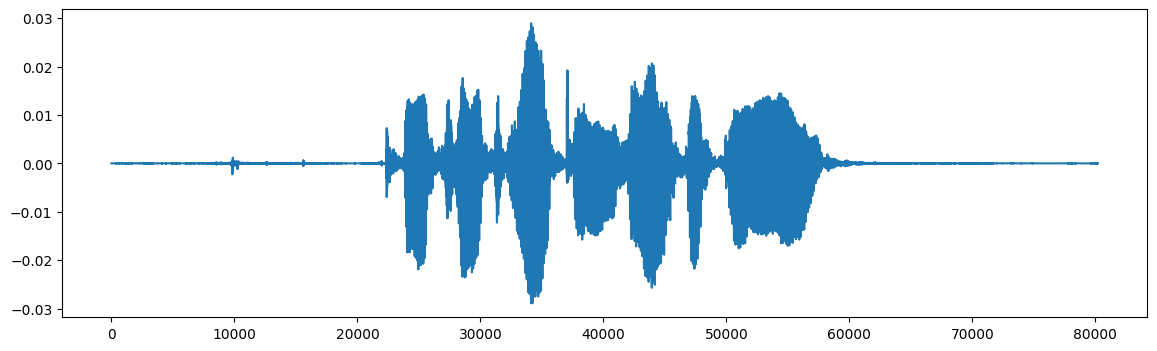

In [20]:
plt.figure(figsize=(14,4))
plt.plot(data)
Audio(path)

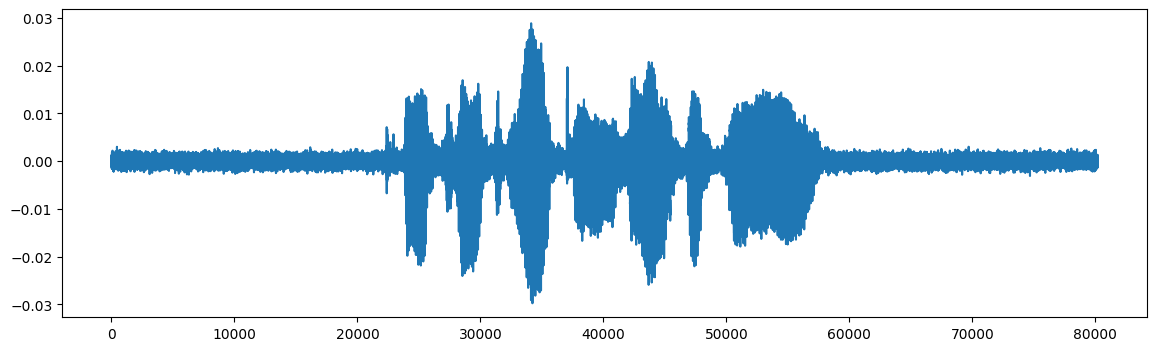

In [21]:
x=noise(data)
plt.figure(figsize=(14,4))
plt.plot(x)
Audio(x,rate=sample_rate)

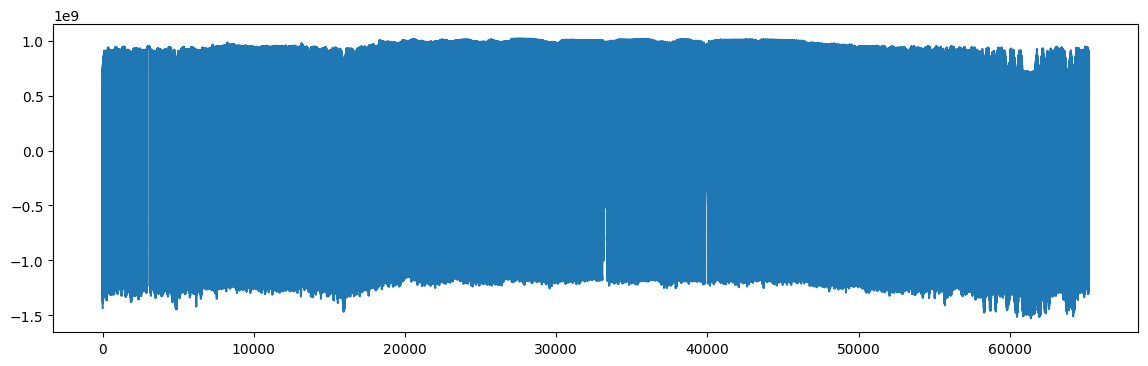

In [22]:
x = stretch(data, rate=0.8)
plt.figure(figsize=(14,4))
plt.plot(x)
Audio(x, rate=sample_rate)

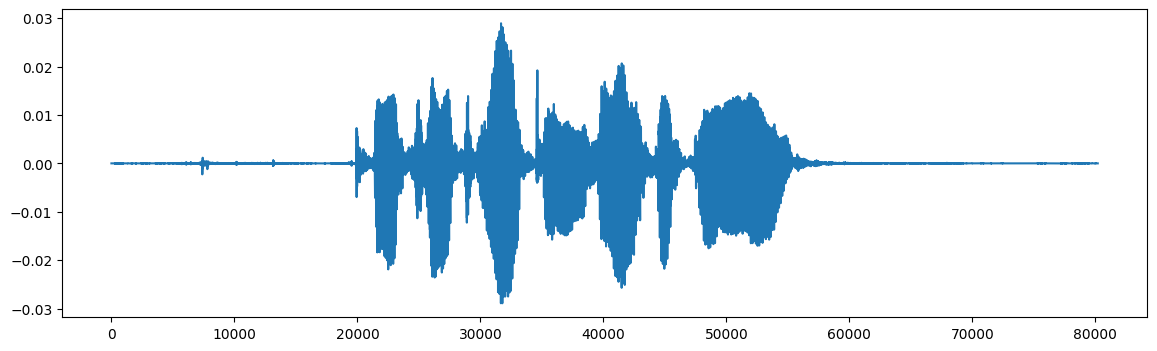

In [23]:
x=shift(data)
plt.figure(figsize=(14,4))
plt.plot(x)
Audio(x, rate=sample_rate)

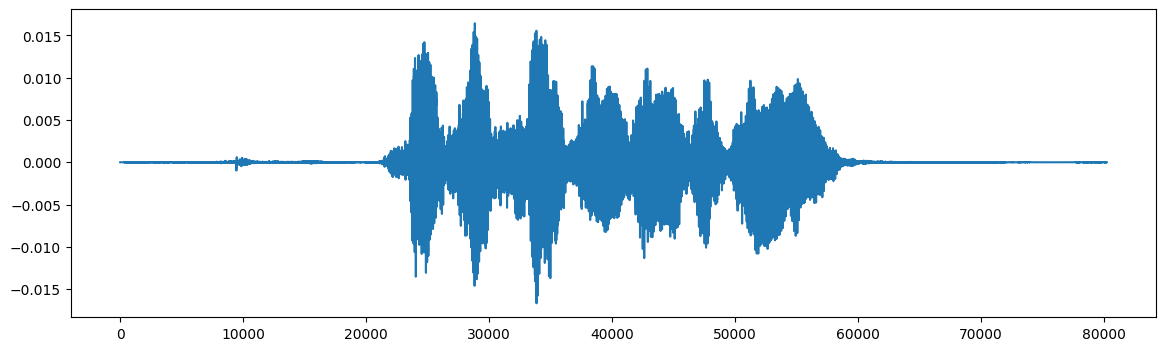

In [24]:
x = pitch(data, sample_rate, pitch_factor=0.7)
plt.figure(figsize=(14,4))
plt.plot(x)
Audio(x,rate=sample_rate)

In [25]:
def extract_features(data):
  result=np.array([])
  zcr=np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
  result=np.hstack((result,zcr))

  stft=np.abs(librosa.stft(data))
  chroma_stft=np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
  result=np.hstack((result,chroma_stft))

  mfcc=np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
  result=np.hstack((result,mfcc))

  rms=np.mean(librosa.feature.rms(y=data).T,axis=0)
  result=np.hstack((result,rms))

  mel=np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
  result=np.hstack((result,mel))

  return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result


In [26]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    try:
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
    except Exception as e:
        print(f"Error processing {path}: {e}")

# Rest of your code...


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [27]:
len(X), len(Y), data_path.Path.shape

(36516, 36516, (12172,))

In [28]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.227281  0.465852  0.465416  0.515722  0.555496  0.589851  0.586350   
1  0.326651  0.643229  0.639970  0.675732  0.721362  0.733707  0.702863   
2  0.241743  0.777995  0.658327  0.672379  0.742866  0.763685  0.680039   
3  0.221630  0.527198  0.493814  0.546133  0.516079  0.604708  0.639711   
4  0.284383  0.660551  0.650588  0.676233  0.652567  0.730288  0.715118   

          7         8         9  ...           153           154  \
0  0.606716  0.689984  0.710391  ...  8.540163e-05  7.720305e-05   
1  0.661363  0.693230  0.725984  ...  2.437950e-04  2.434114e-04   
2  0.706250  0.715254  0.750639  ...  9.925156e+18  1.117132e+19   
3  0.568550  0.608285  0.591129  ...  2.028706e-05  3.135012e-05   
4  0.637476  0.665339  0.637325  ...  8.343035e-05  9.543126e-05   

            155           156           157           158           159  \
0  4.282905e-05  5.061395e-05  8.224082e-05  9.084915e-05  9.267972e-05   
1  2.000662e-04  2.085059e-04  2.440437e-04  2.445690e-04  2.503415e-04   
2  1.304142e+19  1.297771e+19  1.556475e+19  1.663119e+19  2.256122e+19   
3  1.471215e-05  1.807759e-05  1.720036e-05  1.939141e-05  2.566669e-05   
4  7.890097e-05  8.304901e-05  8.161927e-05  8.854199e-05  9.434314e-05   

            160           161   labels  
0  5.275851e-05  4.874961e-06  neutral  
1  2.034610e-04  1.589727e-04  neutral  
2  1.149238e+19  1.141680e+18  neutral  
3  3.414951e-05  3.172760e-06  neutral  
4  9.945590e-05  6.886836e-05  neutral  

[5 rows x 163 columns]

In [29]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [30]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [31]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27387, 162), (27387, 8), (9129, 162), (9129, 8))

In [32]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27387, 162), (27387, 8), (9129, 162), (9129, 8))

In [33]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27387, 162, 1), (27387, 8), (9129, 162, 1), (9129, 8))

In [34]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)           0

In [35]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 13s 12ms/step - loss: 1.7956 - accuracy: 0.2706 - val_loss: 1.5931 - val_accuracy: 0.3527 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 5s 11ms/step - loss: 1.5873 - accuracy: 0.3588 - val_loss: 1.4734 - val_accuracy: 0.4109 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 5s 11ms/step - loss: 1.4927 - accuracy: 0.3991 - val_loss: 1.4168 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 4s 10ms/step - loss: 1.4159 - accuracy: 0.4296 - val_loss: 1.3487 - val_accuracy: 0.4660 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 4s 10ms/step - loss: 1.3758 - accuracy: 0.4493 - val_loss: 1.3459 - val_accuracy: 0.4649 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 5s 12ms/step - loss: 1.3297 - accuracy: 0.4642 - val_loss: 1.2862 - val_accuracy: 0.4819 - lr: 0.0010
Epoch 7/50
428/428 [==============================] - 4s 10ms/s

286/286 [==============================] - 2s 5ms/step - loss: 1.3638 - accuracy: 0.5341
Accuracy of our model on test data :  53.41220498085022 %


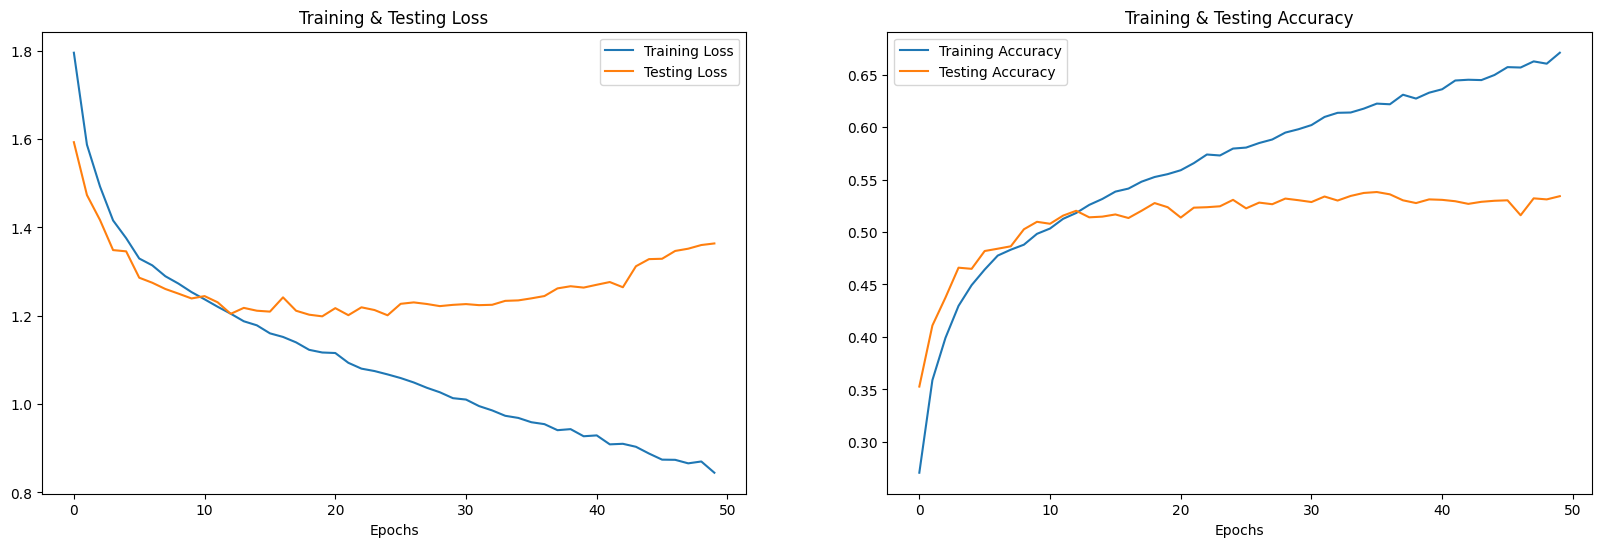

In [36]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [37]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 1s 3ms/step


In [38]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad           sad
1            angry         angry
2              sad           sad
3          disgust       neutral
4            angry         angry
5             fear          fear
6             fear          calm
7              sad           sad
8              sad           sad
9             calm          calm

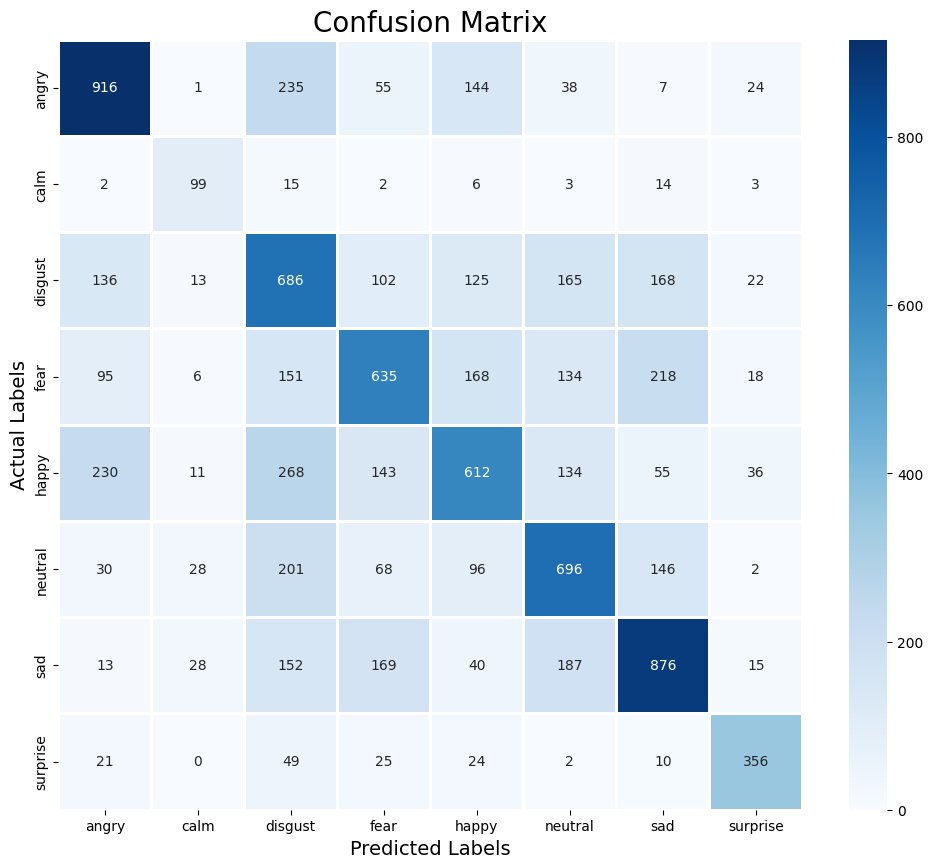

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.63      0.65      0.64      1420
        calm       0.53      0.69      0.60       144
     disgust       0.39      0.48      0.43      1417
        fear       0.53      0.45      0.48      1425
       happy       0.50      0.41      0.45      1489
     neutral       0.51      0.55      0.53      1267
         sad       0.59      0.59      0.59      1480
    surprise       0.75      0.73      0.74       487

    accuracy                           0.53      9129
   macro avg       0.55      0.57      0.56      9129
weighted avg       0.54      0.53      0.53      9129

